# Marketing Analytics

## Introduction
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent
marketing campaigns have not been as effective as they were expected to be. You need to
analyze the data set to understand this problem and propose data-driven solutions.

## Section 01: Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
filename = "/home/andres/Downloads/marketing_analytics_project/marketing_data.csv"
df = pd.read_csv(filename)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Since this is a marketing data set, we can categorize the variables in terms of the 4 P's of marketing: products, people (customers), places (channels), and promotions (discounts & campaigns). The point of categorization is to expand the analyst's perspective. It might also serve as a good way to segment analytical steps further down the line in EDA or statistical analysis.

- People

    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if customer complained in the last 2 years, 0 otherwise
    - Country: Customer's location


- Products

    - MntWines: Amount spent on wine in the last 2 years
    - MntFruits: Amount spent on fruits in the last 2 years
    - MntMeatProducts: Amount spent on meat in the last 2 years
    - MntFishProducts: Amount spent on fish in the last 2 years
    - MntSweetProducts: Amount spent on sweets in the last 2 years
    - MntGoldProds: Amount spent on gold in the last 2 years
    

- Place

    - NumWebPurchases: Number of purchases made through the company's web site
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company's web site in the last month
    

- Promotion

    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Fixing data types
`Income` and `Dt_Customer` are of type "object" (strings). But `Income` should be numerical and `Dt_Customer` should be a date.

In [3]:
# clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

# transform Income column to a numerical
df['Income'] = df['Income'].str.replace('$', '')
# también hay que sacarle la coma porque sino no lo entiende como número
df['Income'] = df['Income'].str.replace(',', '').astype('float')

# convert Dt_Customer to date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# clean dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Data copada (de Jack Daoud)
In terms of Education, both "2n Cycle" and "Master" refer to the same level of education. This is based off the Three Cycle System from the European Higher Education Area (EHEA). Therefore, we'll merge the two education levels under "Master". Also, "Graduation" is a little misleading as an education level. We'll assume that it refers to an "Undergraduate" education and rephrase it as such.

My fusion of '2n Cycle' with 'Master' also aligns with some of the findings in your visualization. For example, the Income spread between '2n Cycle' and 'Master' in regions SA, US, CA, and SP are very close.

The levels of the Education feature are intentionally misleading so that the analyst is motivated to explore & analyze at a deeper level. 

based on the age of the customers, it would be more realistic and safe to assume that '2n Cycle' should be 'Bachelor'. I'll have to adjust my notebook 

### Are there any null values?

In [4]:
# Identify missing values
df.isnull().sum().sort_values(ascending=False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

We can see that the field `Income` has 24 missing values. In order to find the best strategy for imputation, we plot this feature.

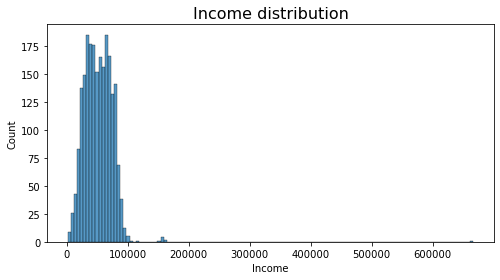

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(data=df['Income'])

plt.title('Income distribution', size=16)
plt.ylabel('Count');

We can see there are some outliers, so it would be best to use the median instead of the mean value in order to prevent skewing.

In [25]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Análisis de Daoud
An easy approach is to simply drop the data from our analysis, but the easy way is myopic. Instead, we're going to take the difficult but rewarding approach, we're going to impute the missing values.

Imputation of missing values requires an assumption, and in this case, we're going to assume:

    Customers with similar education and marital status make the same yearly income, on average.

This means we'll have to compute the mean (average) Income of customers across two categorical variables:

    Marital_Status
    Education

Before doing so, let's inspect these two categorical variables further. What are the different types of education levels and marital statuses?

In [26]:
# print unique values of categorical variables Education and Marital_Status
print('Education categories:', *df['Education'].unique(), '', sep='\n')
print('Marital Status categories:', *df['Marital_Status'].unique(), sep='\n')

Education categories:
Graduation
PhD
2n Cycle
Master
Basic

Marital Status categories:
Divorced
Single
Married
Together
Widow
YOLO
Alone
Absurd


We'll have to find some information about different education levels and then maybe make some assumptions about marital statuses.

In terms of Education, both "2n Cycle" and "Master" refer to the same level of education. This is based off the Three Cycle System from the European Higher Education Area (EHEA). Therefore, we'll merge the two education levels under "Master". Also, "Graduation" is a little misleading as an education level. We'll assume that it refers to an "Undergraduate" education and rephrase it as such.

In terms of Marital_Status, "YOLO", "Alone", and "Absurd" can be interpreted and assumed to mean "Single", and as such, these statuses will be merged under "Single". One can argue that "Absurd" doesn't mean "Single", but as someone with a philosophical background, I can assure you that people who perceive marital status as absurd are predominantly single..

In [46]:
# reemplazo "2n cycle" por "Master"
df['Education']= df['Education'].replace(['2n Cycle'],'Master')

# reemplazo "Graduation" por "Undergraduate"
df['Education']= df['Education'].replace(['Graduation'],'Undergraduate')

# reemplazo 'YOLO', 'Absurd', and 'Alone' por 'Single'
df['Marital_Status']= df['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone'],'Single')

In [47]:
# chequeo los cambios:
print('Education categories:', *df['Education'].unique(), '', sep='\n')
print('Marital Status categories:', *df['Marital_Status'].unique(), sep='\n')

Education categories:
Undergraduate
PhD
Master
Basic

Marital Status categories:
Divorced
Single
Married
Together
Widow


Now let's caluclate the average income of each type of customers in terms of Marital_Status and Education.

In [52]:
print(df.groupby('Education')['Income'].mean(), '\n')
print(df.groupby('Marital_Status')['Income'].mean())

Education
Basic            20306.259259
Master           51046.969912
PhD              56145.313929
Undergraduate    52720.373656
Name: Income, dtype: float64 

Marital_Status
Divorced    52834.228448
Married     51724.978996
Single      51028.811715
Together    53245.534031
Widow       56481.552632
Name: Income, dtype: float64


In [79]:
average_income = pd.pivot_table(df, values='Income', index=['Marital_Status'], columns=['Education'], aggfunc=np.mean)
average_income

Education,Basic,Master,PhD,Undergraduate
Marital_Status,,,,
Divorced,9548.000000,49972.833333,53096.615385,54526.042017
Married,21960.500000,50686.055046,58138.031579,50800.258741
Single,18238.666667,53751.079646,53039.666667,51365.633065
Together,21240.071429,49495.936709,56041.422414,55758.480702
Widow,22123.000000,56211.125000,60288.083333,54976.657143


In [63]:
# join the average values with the missing values

# identifico la parte del df que tiene los null values:
df[df['Income'].isna()].head()

# a este subset le quiero hacer un merge con average_income en la columna "Income"
# primero le tengo que dar la forma adecuada a average_income
# lo que necesito hacer es un "melt" de la tabla

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Undergraduate,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Undergraduate,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA


In [80]:
# Marital_Status es un index, para que sea columna tengo que hacer:
average_income.reset_index(inplace=True)
average_income

Education,Marital_Status,Basic,Master,PhD,Undergraduate
0,Divorced,9548.000000,49972.833333,53096.615385,54526.042017
1,Married,21960.500000,50686.055046,58138.031579,50800.258741
2,Single,18238.666667,53751.079646,53039.666667,51365.633065
3,Together,21240.071429,49495.936709,56041.422414,55758.480702
4,Widow,22123.000000,56211.125000,60288.083333,54976.657143


In [81]:
pd.melt(average_income, id_vars=['Marital_Status'], value_vars=['Basic', 'Master', 'PhD', 'Undergraduate'], value_name='Income')

,Marital_Status,Education,Income
0,Divorced,Basic,9548.000000
1,Married,Basic,21960.500000
2,Single,Basic,18238.666667
3,Together,Basic,21240.071429
4,Widow,Basic,22123.000000
5,Divorced,Master,49972.833333
6,Married,Master,50686.055046
7,Single,Master,53751.079646
8,Together,Master,49495.936709
9,Widow,Master,56211.125000


In [ ]:
# ahora tengo que hacer el join de esto con la parte del df que tiene los null values

### Are there any outliers?

In [218]:
# calculate the quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# calculate the number of outliers for every field
num_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
num_outliers = num_outliers.sort_values(ascending=False)
num_outliers

Response               334
MntSweetProducts       248
MntFruits              227
MntFishProducts        223
MntGoldProds           207
MntMeatProducts        175
AcceptedCmp4           167
AcceptedCmp3           163
AcceptedCmp5           163
AcceptedCmp1           144
NumDealsPurchases       86
MntWines                35
AcceptedCmp2            30
NumCatalogPurchases     23
Complain                21
NumWebVisitsMonth        8
NumWebPurchases          4
Year_Birth               3
Education                0
Dt_Customer              0
Country                  0
ID                       0
Kidhome                  0
Marital_Status           0
Teenhome                 0
NumStorePurchases        0
Recency                  0
 Income                  0
dtype: int64

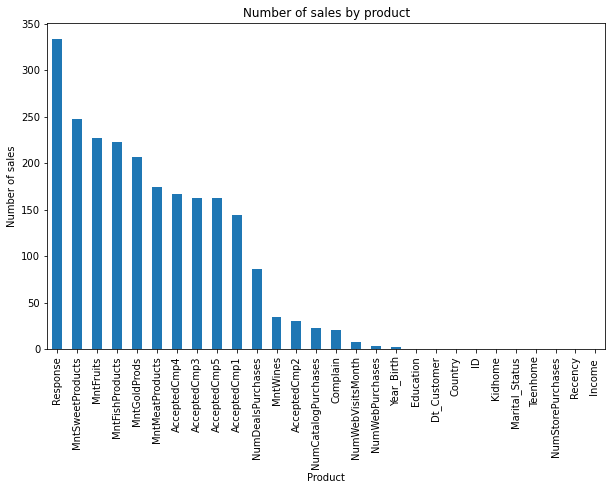

In [219]:
# grafico la cantidad de outliers
g = num_outliers.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product')
plt.ylabel('Number of sales')
plt.title('Number of sales by product')
_ = plt.setp(g.get_xticklabels(), rotation=90)

We can see that the variable `Response` has the most outliers, followed by the amount of purchases made and the success of each campaign.<br>
We can visualize those outliers using box plots:

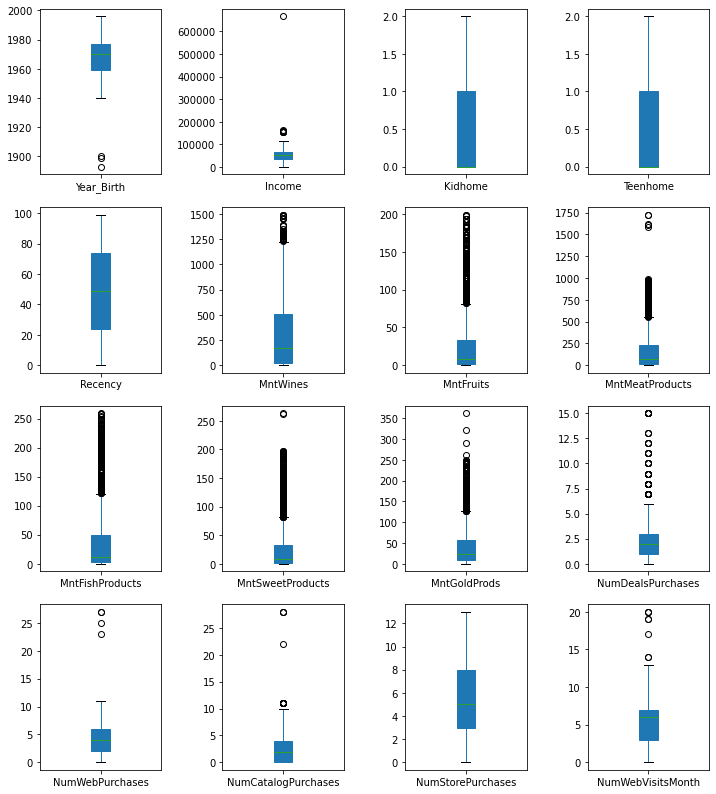

In [26]:
# select columns to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Multiple features contain outliers, but the only that likely indicate data entry errors are `Year_Birth` <= 1900. We remove those rows:

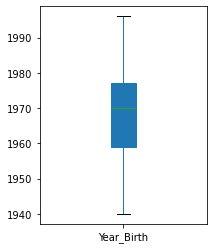

In [27]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind='box', patch_artist=True);

### Are there any useful variables that you can engineer with the given data?

- The total number of dependents in the home (`Dependents`) can be engineered from the sum of `Kidhome` and `Teenhome`
- The year of becoming a customer (`Year_Customer`) can be engineered from `Dt_Customer`
- The total amount spent (`TotalMnt`) can be engineered from the sum of all features containing the keyword "Mnt"
- The total purchases (`TotalPurchases`) can be engineered from the sum of all features containing the keyword "Purchases"
- The total number of campains accepted (`TotalCampaignsAcc`) can be engineered from the sum of all features containing the keywords "Cmp" and `Response` (the latest campaign)


In [31]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


### Do you notice any patterns or anomalies in the data? Can you plot them?

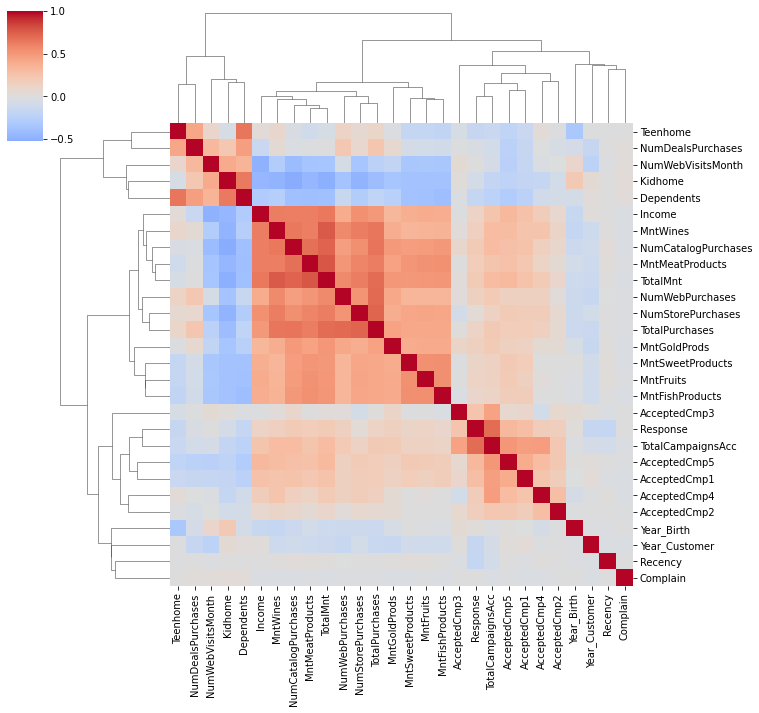

In [32]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.

From this heatmap we can observe the following clusters of correlated features:
- The "High Income" cluster:
    - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
    - Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'
    
- The "Have Kids & Teens" cluster:
    - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'Dependents' (with a stronger effect from kids vs. teens)
    - Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'
    
- The "Advertising Campaigns" cluster:
    - Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
    - Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster
    
Anomalies:
- Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
- Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website

We plot the effect of high income on spending:

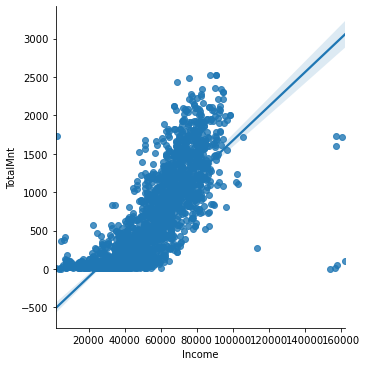

In [33]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 200000]);

Plot the negative effect of having dependents (kids & teens) on spending:

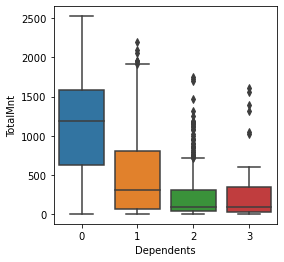

In [34]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=df);

Plot the positive effect of having dependents (kids & teens) on number of deals purchased:

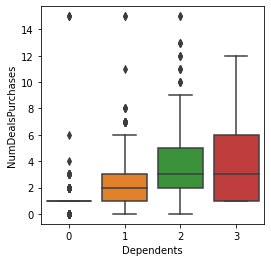

In [35]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=df);

Plot the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance:

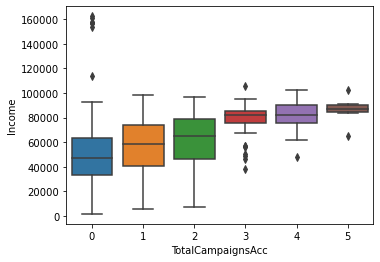

In [36]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=df[df['Income']<200000]);

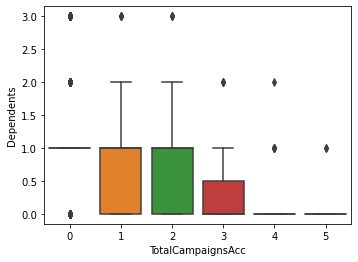

In [38]:
# estos 2 tienen que ir juntos!

plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=df);

We find an anomaly:

- Number of web visits in the last month is not positively correlated with number of web purchases
- Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website


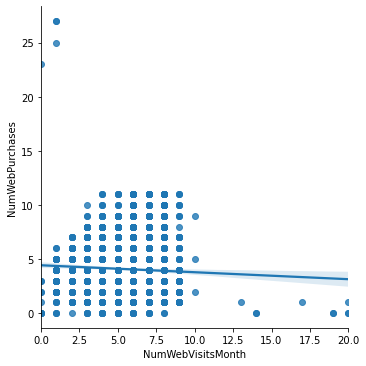

In [40]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df);

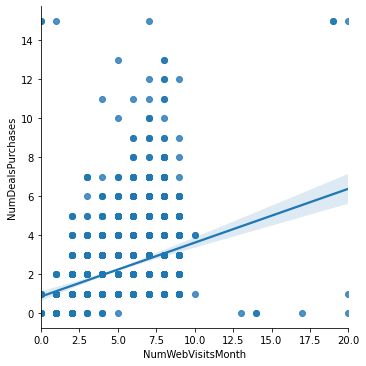

In [41]:
# estos 2 tmb van juntos
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df);

## Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

### What factors are significantly related to the number of store purchases?

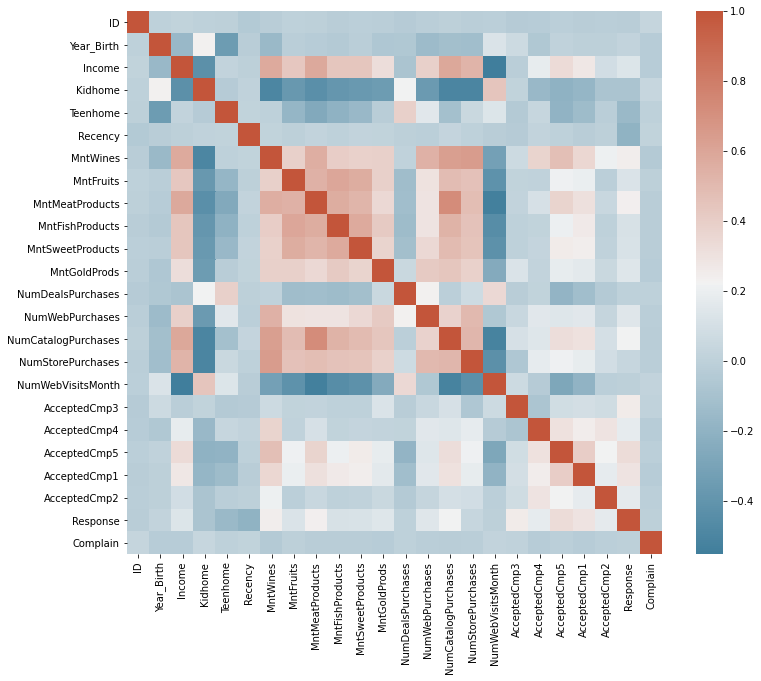

In [228]:
# First we visualize the correlation between all variables
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)
_ = sns.heatmap(corr, annot=False, cmap=cmap)

Cómo determinar qué valores de correlación son significativos: hay distintas maneras. En un artículo proponen la siguiente guía: mayor que 0.5: grande. Entre 0.3 y 0.5: moderada. Menor a 0.3, pequena.
https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

Creo que lo más serio es mirar el p-value.

Por ahora me quedo con las variables que tienen correlación mayor a 0.5:

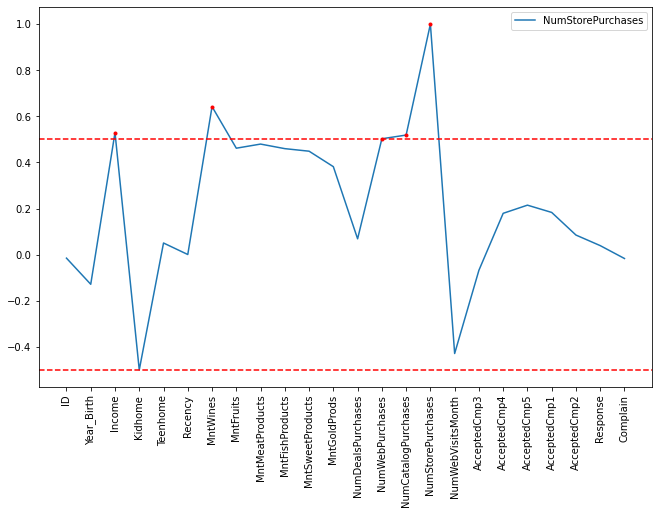

In [249]:
# Now we plot the correlation between "NumStorePurchases" and all the other variables
c = corr[['NumStorePurchases']]
ind = c.ge(0.5)

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=corr[['NumStorePurchases']], ax=ax)
_ = plt.setp(g.get_xticklabels(), rotation=90)

_ = plt.plot(c[ind], '.r')
_ = plt.axhline(0.5, xmin=0, xmax=1, color = 'r', linestyle='--')

# ojo que también me interesan las correlaciones negativas!!
_ = plt.axhline(-0.5, xmin=0, xmax=1, color = 'r', linestyle='--')
ind2 = c.le(-0.5)
_ = plt.plot(c[ind2], '.r')

# combino las 2 condiciones (la 2da dio vacía)
ind = ind | ind2

In [250]:
ind[ind.values  == True]

,NumStorePurchases
Income,True
MntWines,True
NumWebPurchases,True
NumCatalogPurchases,True
NumStorePurchases,True


We can see that the number of store purchases is significantly related to customer's income, the amount spent on wine in the last 2 years, the number of purchases made through the company's web site, the number of purchases made using a catalog, and the number of purchases made directly in stores.

### Incorporar la técnica que usó la piba

Ojo que en ese análisis la piba dice que sólo ciertas variables son relevantes, pero más adelante (en la pregunta falopa) descubre que la compra de oro tiene una correlación significativa

### Does US fare significantly better than the Rest of the World in terms of total purchases?

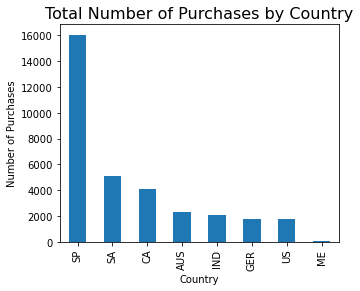

In [47]:
plt.figure(figsize=(5,4))
df.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

- Spain (SP) has the highest number of purchases
- US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

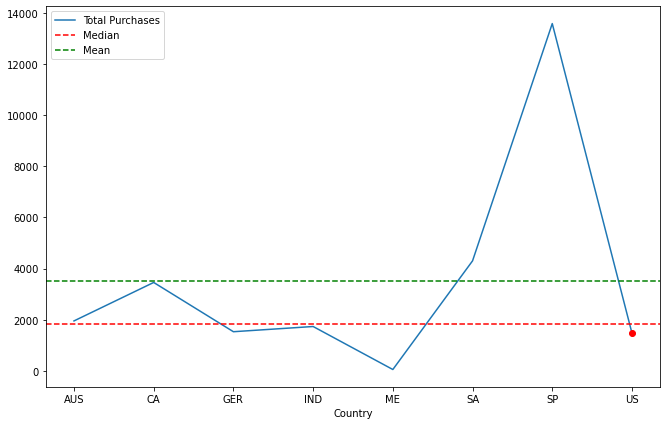

In [232]:
# mi versión:
# Ahora agrupo por país

#df.groupby(['Country']).sum()

purchases_by_country = df[['Total Purchases', 'Country']].groupby(['Country']).sum()

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=purchases_by_country, ax=ax)
_ = plt.plot(purchases_by_country.iloc[[-1]], 'or')

# calculate median purchases by country
median_purchases = purchases_by_country['Total Purchases'].median()
mean_purchases = purchases_by_country['Total Purchases'].mean()

_ = plt.axhline(median_purchases, xmin=0, xmax=1, color = 'r', linestyle='--', label='Median')
_ = plt.axhline(mean_purchases, xmin=0, xmax=1, color = 'g', linestyle='--', label='Mean')
_ = ax.legend()

We can see that the US is having little sales compared to the rest of the world. It is below the median and below the mean.

### Is there a significant relationship between geographical region and success of a campaign?
La variable "response" me dice si hubo una venta producto de la campana, así que miro la cantidad de éxitos por país.

Pero hay que tener en cuenta cuánta gente vio la campana

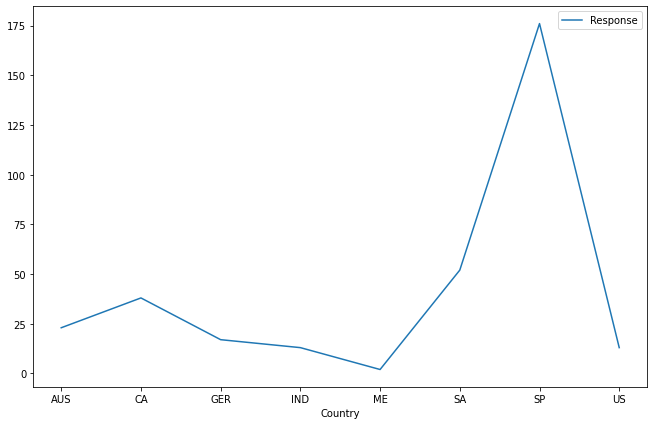

In [233]:
response_by_country = df[['Response', 'Country']].groupby(['Country']).sum()

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=response_by_country, ax=ax)

Se ve que en Espana se vendió mucho más. Pero no es que haya una correlación con la ubicación geográfica.

### Ver si se puede incorporar algo
Ojo que acá la piba interpretó mal la variable "Response", y la interpretación que hace de los porcentajes de aceptación posiblemente es falopa

Igual no queda claro qué es esa variable, porque hay casos donde response vale 1 pero no hay ninguna campana que valga 1. Eso puede ser una anomalía en los datos, o que no estoy entendiendo.

### What factors are significantly related to amount spent on fish?
Me propone que considere "married phd candidates" y que piense otras, considerando interaction/effects (?)

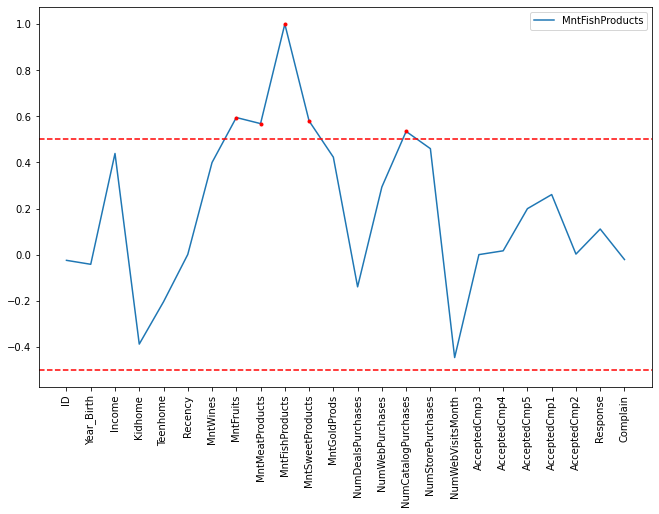

In [251]:
# veo qué cosas están más correlacionadas con "MntFishProducts"

c = corr[['MntFishProducts']]
ind = c.ge(0.5)

fig, ax = plt.subplots(figsize=(11, 7))
g = sns.lineplot(data=corr[['MntFishProducts']], ax=ax)
_ = plt.setp(g.get_xticklabels(), rotation=90)

_ = plt.plot(c[ind], '.r')
_ = plt.axhline(0.5, xmin=0, xmax=1, color = 'r', linestyle='--')

# correlaciones negativas
_ = plt.axhline(-0.5, xmin=0, xmax=1, color = 'r', linestyle='--')
ind2 = c.le(-0.5)
_ = plt.plot(c[ind2], '.r')

# combino las 2 condiciones
ind = ind | ind2

In [252]:
ind[ind.values  == True]

,MntFishProducts
MntFruits,True
MntMeatProducts,True
MntFishProducts,True
MntSweetProducts,True
NumCatalogPurchases,True


We see that the amount spent on fish is significantly related to the amount spent on fruit, meat, fish, sweets, and the number of purchases made using a catalog.

### Nuevamente incorporar el análisis SHAP

## Section 03: Data Visualization

### Which marketing campaign is most successful?

In [236]:
# hago un recuento de cuántas ventas hubo en cada campana

sales_by_campaign = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
sales_by_campaign = sales_by_campaign.sort_values(ascending=False)
sales_by_campaign

AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp3    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

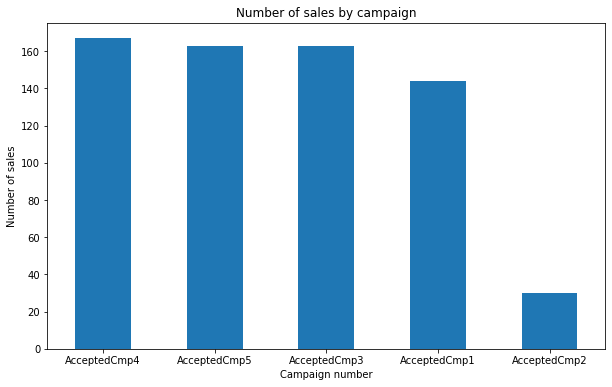

In [237]:
g = sales_by_campaign.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Campaign number')
plt.ylabel('Number of sales')
plt.title('Number of sales by campaign')
_ = plt.setp(g.get_xticklabels(), rotation=0)

We can see that the fourth campaign was the most successful, although the third and fifth had very similar success.

The first campaign was also very successful, while only the second one had a poor performance. This suggests a hidden bias in the data.

### What does the average customer look like for this company?

Me tengo que quedar con todos aquellos que compraron, es decir aquellos que tienen "Response" igual a 1.

In [238]:
df_customers = df[df['Response'] == 1]
df_customers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total Purchases
count,334.000000,334.000000,333.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.000000,334.000000
mean,5421.820359,1969.416168,60209.675676,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,...,6.095808,5.293413,0.230539,0.185629,0.275449,0.236527,0.059880,1.0,0.008982,15.371257
std,3154.132439,12.398192,23194.080987,0.487347,0.492741,27.659499,427.183786,46.099519,286.890036,61.855885,...,3.081931,2.569891,0.421810,0.389390,0.447411,0.425587,0.237621,0.0,0.094489,6.827775
min,1.000000,1943.000000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,3.000000
25%,2785.250000,1959.000000,39763.000000,0.000000,0.000000,11.000000,96.000000,4.000000,47.750000,4.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,10.000000
50%,5133.000000,1971.000000,64090.000000,0.000000,0.000000,30.000000,448.000000,21.000000,174.500000,25.000000,...,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,16.000000
75%,8127.750000,1979.000000,80589.000000,1.000000,1.000000,56.000000,875.500000,53.750000,509.750000,84.250000,...,8.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,21.000000
max,11133.000000,1996.000000,105471.000000,2.000000,2.000000,99.000000,1492.000000,193.000000,981.000000,250.000000,...,13.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,32.000000


The average customer was born in 1969, has an average of 0.3 kids and 0.3 teens in the household. Ojo que para no dar pibes fraccionarios se puede usar la mediana.

El sueldo del cliente promedio es de aprox. $60000 anual.

Me quedo sólo con la descripción del sujeto, no con lo que consumió. Queda ver: educación, marital status, income

In [239]:
df_customers[['Education']].value_counts()

Education 
Graduation    152
PhD           101
Master         57
2n Cycle       22
Basic           2
dtype: int64

The majority of customers has a degree, followed by those who have a PhD.

In [240]:
df_customers[['Marital_Status']].value_counts()

Marital_Status
Single            106
Married            98
Together           60
Divorced           48
Widow              19
YOLO                1
Alone               1
Absurd              1
dtype: int64

The majority of customers are either single or married

### Los parámetros que consideró la piba

- Born in 1969
- Became a customer in 2013
- Has an income of roughly $52,000 per year (esto le da diferente porque no se quedó con los que tienen Response = 1)
- Has 1 dependent (roughly equally split between kids or teens)
- Made a purchase from our company in the last 49 days

### Chequear si hay ID que tengan response = 0 pero que hayan comprado algo

### Which products are performing best?

In [241]:
# calculo las ventas totales de cada producto, igual que con las campanas

sales_by_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
sales_by_product = sales_by_product.sort_values(ascending=False)
sales_by_product

MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64

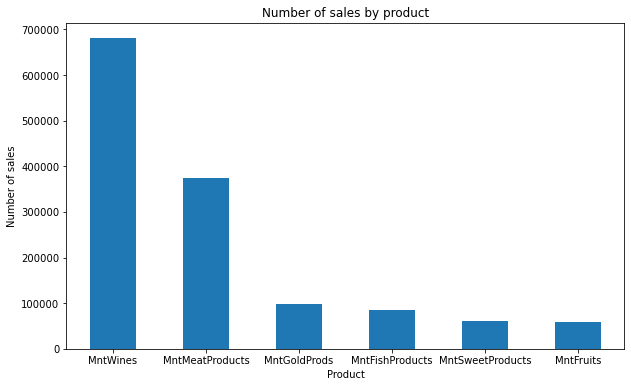

In [242]:
g = sales_by_product.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product')
plt.ylabel('Number of sales')
plt.title('Number of sales by product')
_ = plt.setp(g.get_xticklabels(), rotation=0)

By far the best performing product is wine, at least in number of purchases. (La cantidad de dinero no la tengo)

### Piba:

The average customer spent:
- \$25-50 on Fruits, Sweets, Fish, or Gold products
- Over \$160 on Meat products
- Over \$300 on Wines
- Over \$600 total

Products performing best:
- Wines
- Followed by meats


### Which channels are underperforming?

In [243]:
sales_by_channel = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
sales_by_channel = sales_by_channel.sort_values(ascending=False)
sales_by_channel

NumStorePurchases      12970
NumWebPurchases         9150
NumCatalogPurchases     5963
dtype: int64

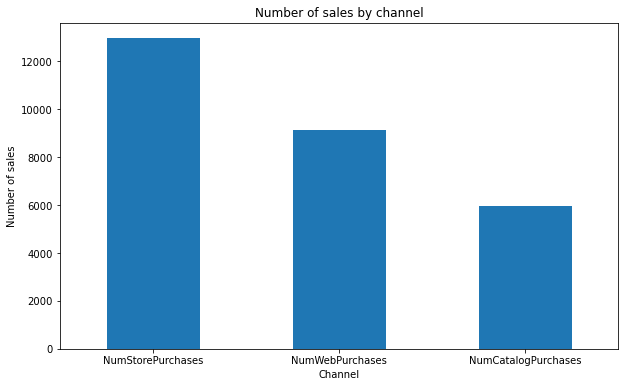

In [244]:
g = sales_by_channel.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Channel')
plt.ylabel('Number of sales')
plt.title('Number of sales by channel')
_ = plt.setp(g.get_xticklabels(), rotation=0)

Both the "web" and the "catalog" channel are underperforming compared to the "store" channel.

### Piba:
Channels: The average customer...
- Accepted less than 1 advertising campaign
- Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store purchases
- Averaged 14 total purchases
- Visited the website 5 times

Underperforming channels:
- Advertising campaigns
- Followed by deals, and catalog


## Section 04: CMO Recommendations

De la sección 1 (análisis exploratorio) no veo nada para comentar.

Sección 3: meterle pila a las ventas por web y por catálogo. Con el desempeno comparativo de cada producto qué se puede hacer?

Sobre las campanas, está bien hacer 5, porque en cada nueva campana se vende igual cantidad (salvo el bias raro de la 2da)

Sección 2: sobre el desempeno comparativo de cada país qué se puede hacer?

Sobre las causas (correlaciones) de store purchases no sé qué hacer.

Idem con ventas de pescado

### Piba:

#### Summary of actionable findings to improve advertising campaign success:

- The most successful advertising campaign was the most recent campaign (column name: Response), and was particularly successful in Mexico (>60% acceptance rate!)
        Suggested action: Conduct future advertising campaigns using the same model recently implemented in Mexico.
        
- Advertising campaign acceptance is positively correlated with income and negatively correlated with having kids/teens
        Suggested action: Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens
        
- The most successful products are wines and meats (i.e. the average customer spent the most on these items)
        Suggested action: Focus advertising campaigns on boosting sales of the less popular items
        
- The underperforming channels are deals and catalog purchases (i.e. the average customer made the fewest purchases via these channels)
- The best performing channels are web and store purchases (i.e. the average customer made the most purchases via these channels)
        Suggested action: Focus advertising campaigns on the more successful channels, to reach more customers
